Maryanne, Mark, Bernie
CS-215
Project 2

#Please note ChatGPT was utlized for G-Force integration. This is included in commentary in that section!

PART 1: LINEAR MOTION

Using the linear accelerometer sensor, conduct some data collection experiments in your group. At minimum, be sure to include the following:

Measurement: Use your phone and the linear accelerometer data to measure how tall someone in your group is, give their name and actual height. **Make sure to take a measurement with each group member's phone!**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Data management: Describe the app used and the process of getting the data from the phone to your Jupyter environment

The phone started on the floor to zero it out being midful of potential calibrations. It was then picked up messuring Maryanne at a constant rate. It was then stopped at her head for 2 seconds to get an accurate reading. The PhysicsToolbox App was utilized via its linear accelerometer feature. Maryanne estimates her height to be 5 feet 3 inches. After collecting data this was saved, shared amongst eachother and uploaded to a google drive as well. (WE MAY CHANGE THIS PORTION LATER FROM HERE: Data from other phone held inconsistencies in measurement, similar to this own device. Though as will be identified later, similarities in measurements could be deduced. 

Data wrangling: Explain what you did to adjust, clean, and otherwise prepare the data for the analysis

The phone started on the floor to zero it out being midful of potential calibrations. It was then picked up messuring Maryanne at a constant rate. It was then stopped at her head for 2 seconds to get an accurate reading. The PhysicsToolbox App was utilized via its linear accelerometer feature. Maryanne estimates her height to be 5 feet 3 inches. After collecting data this was saved, shared amongst eachother and uploaded to a google drive as well. (WE MAY CHANGE THIS PORTION LATER FROM HERE: Data from other phone held inconsistencies in measurement, similar to this own device. Though as will be identified later, similarities in measurements could be deduced. 

In [3]:
#Importing Maryanne's height CSV, preilminary examination of data. All the a_ columns are measured in (m/s^2)
m_height_1 = pd.read_csv("Maryanne Height 2 (Bernie’s iPhone) .csv")
m_height_1.describe()

,time,ax,ay,az,atotal
count,1241.000000,1241.000000,1241.000000,1241.00000,1241.000000
mean,6.188104,-0.006930,-0.021684,0.11145,0.456414
std,3.570775,0.277741,0.252590,0.39464,0.311187
min,0.009438,-1.100000,-0.840000,-2.90000,0.020000
25%,3.096498,-0.150000,-0.160000,-0.06000,0.240000
50%,6.184110,0.000000,-0.020000,0.13000,0.380000
75%,9.271844,0.130000,0.100000,0.31000,0.590000
max,12.359753,1.870000,0.930000,2.06000,3.120000


Visualization: Use matplotlib to visualize the acceleration, velocity and position data, describe the graph and whether it seems to make sense

Text(0.5, 1.0, 'Depiction of All Columns of Data')

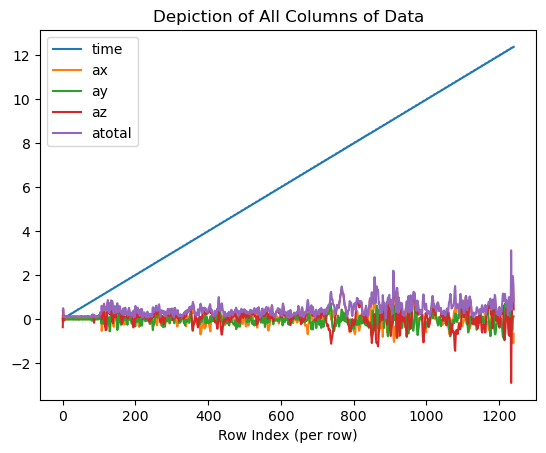

In [4]:
m_height_1.plot()
plt.xlabel("Row Index (per row)")
plt.title("Depiction of All Columns of Data")

Text(0.5, 1.0, 'Plot of Acceleration')

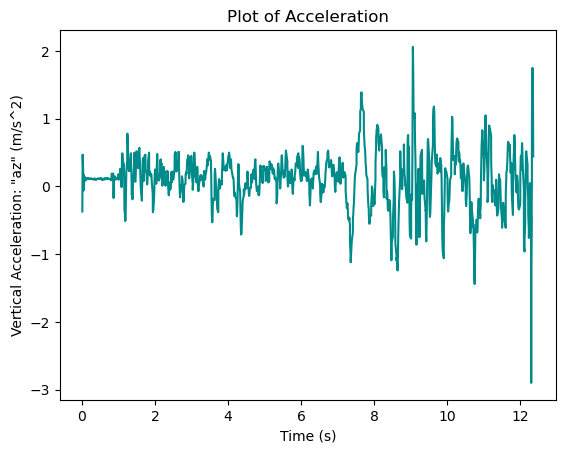

In [5]:
#Examining specific column (az). This sees a transition from the X-Axis in terms of Row index to Time (measured in seconds).
plt.plot(m_height_1["time"], m_height_1["az"], color = "DarkCyan")
plt.xlabel("Time (s)")
plt.ylabel("Vertical Acceleration: \"az\" (m/s^2)")
plt.title("Plot of Acceleration")


In [6]:
#Data doesn't exactly start calibrated at 0. This appears to be a limitation with the app itself on iPhone as calibration is not possible.
#Removal of Noise from the data: Will calculate the baseline value (z_baseline) by an average of the first 50 rows, and then create a new column where the baseline value is subtracted from the Z Acceleration (az). This is the function of Z Acceleration (subtracted value).
z_baseline_1 = m_height_1["az"].iloc[0:100].mean()
m_height_1["Subtracted Value"] = m_height_1["az"] - z_baseline_1
m_height_1

,time,ax,ay,az,atotal,Subtracted Value
0,0.009438,0.13,-0.06,-0.37,0.39,-0.4799
1,0.018031,0.03,0.14,0.47,0.49,0.3601
2,0.039523,-0.07,-0.05,0.13,0.15,0.0201
3,0.040812,0.07,-0.02,-0.06,0.09,-0.1699
4,0.048147,-0.05,-0.01,0.17,0.17,0.0601
...,...,...,...,...,...,...
1236,12.323571,-0.25,-0.48,0.98,1.11,0.8701
1237,12.338100,-0.71,-0.28,1.68,1.84,1.5701
1238,12.339661,-0.88,0.01,1.75,1.95,1.6401
1239,12.354069,-1.10,0.08,1.16,1.60,1.0501


Analysis: Use numpy.cumsum() to analyze the data, describe how this is akin to integration, connect to the ideas of acceleration, velocity and position that you learned in calculus


THIS CORRESPONDS TO WORK ABOVE,FIGURE OUT WHERE TO MOVE IN + WRITE UP

Text(0.5, 1.0, 'Plot of Velocity')

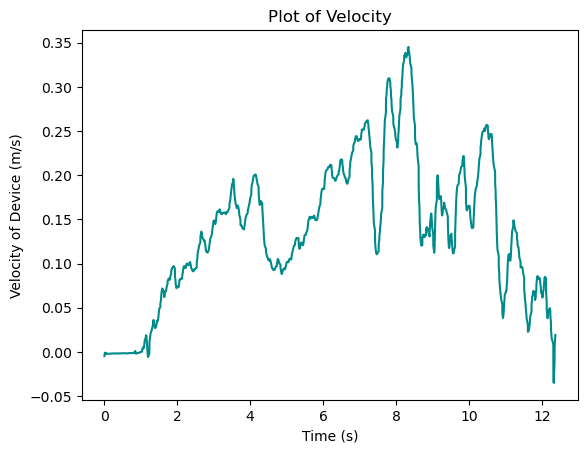

In [7]:
#Calculation of dt:
dt_1 = m_height_1["time"].iloc[-1]/m_height_1.shape[0]
#Numeric Integration:
#First step is the creation of a new column (z_velocity). This is created via the integration of Z acceleration. This is now measured in (m/s). 
m_height_1["z_velocity"] = m_height_1["Subtracted Value"].cumsum() * dt_1
plt.plot(m_height_1["time"], m_height_1["z_velocity"], color = "DarkCyan")
plt.xlabel("Time (s)")
plt.ylabel("Velocity of Device (m/s)")
plt.title("Plot of Velocity")

Analysis: Use the acceleration data to determine how far your phone traveled during the linear motion. Do all of the measurements from the different phones agree?

Data across devices we could immediately tell would not match up. Uncertain to whether or not this a calibration issue or simply human user error we focused upon a single test case and will later compare its results to a different test case on the same person. 


Text(0.5, 1.0, 'Vertical Position of Device')

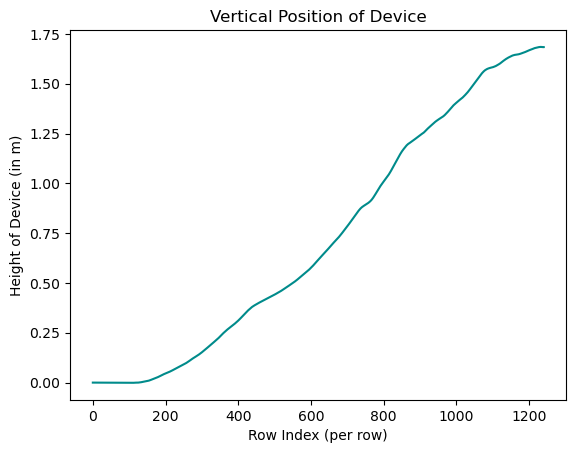

In [9]:
#Now to get from z-velocity to examining position, we integrate things again in a similar process to seen just above. This creates z_position.
m_height_1["z_position"] = m_height_1["z_velocity"].cumsum() * dt_1
plt.plot(m_height_1["z_position"], color = "DarkCyan")
plt.xlabel("Row Index (per row)")
plt.ylabel("Height of Device (in m)")
plt.title("Vertical Position of Device")

In [10]:
#1100:1200 comes from iloc from rows before graph was switched to time.
height_1 = m_height_1["z_position"].iloc[1100:1200].mean()
height_1

1.6300923653538655

In this test case Maryanne's height is estimated at 1.63 or 5.34 feet. This is actually quite close to Maryanne's true height!!

Text(0.5, 1.0, 'Vertical Position of Device over Time')

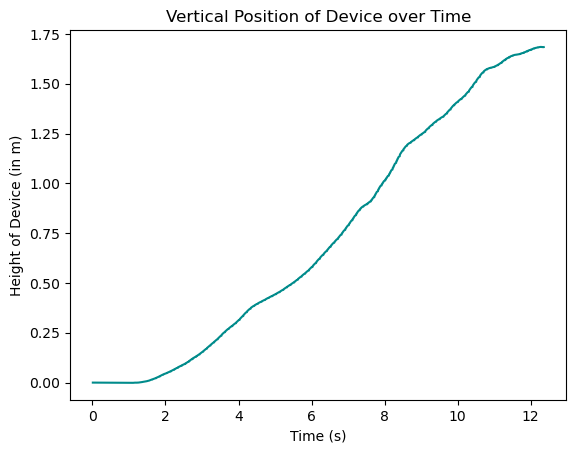

In [11]:
#This graph now sees the adjustment (seen in other graphs) to with respect to time on the x-axis. 
plt.plot(m_height_1["time"], m_height_1["z_position"], color = "DarkCyan")
plt.xlabel("Time (s)")
plt.ylabel("Height of Device (in m)")
plt.title("Vertical Position of Device over Time")

Additional analysis: Include an above & beyond element in your write-up

As we all have iphones and subsequently the calibration limitations, we decided for the above and beyond to compare data on the same device to see if results would differ. This analysis will omit certain graphs seen above as the main point of emphasis is to examine the resulting Height measurement after integrations. 

Text(0.5, 1.0, 'Plot of Acceleration')

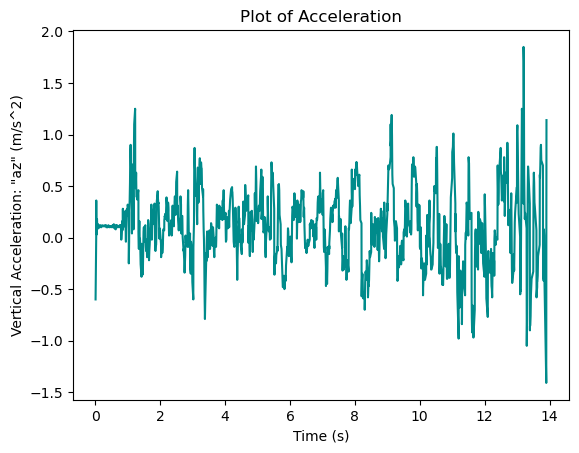

In [12]:
m_height_2 = pd.read_csv("Maryanne Height 3(Bernie’s IPhone).csv")
#m_height_2["az"].plot() - Utilized to figure out iloc[range] for in later steps. 
plt.plot(m_height_2["time"], m_height_2["az"], color = "DarkCyan")
plt.xlabel("Time (s)")
plt.ylabel("Vertical Acceleration: \"az\" (m/s^2)")
plt.title("Plot of Acceleration")

Text(0.5, 1.0, 'Plot of Velocity')

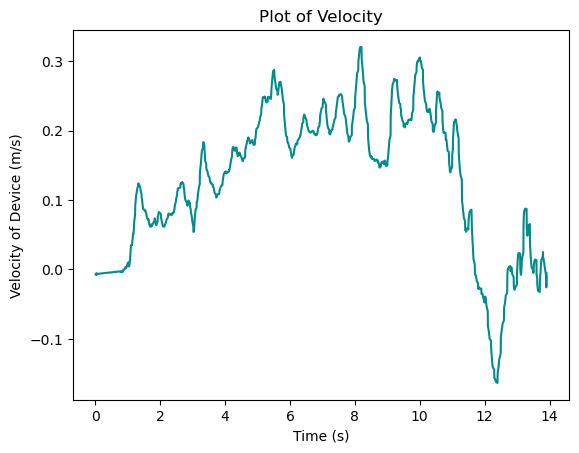

In [13]:
z_baseline_2 = m_height_2["az"].iloc[0:90].mean()
m_height_2["Subtracted Value"] = m_height_2["az"] - z_baseline_2
#Here again we begin with our calculation of dt. 
dt_2 = m_height_2["time"].iloc[-1]/m_height_2.shape[0]
#Numeric Integration:
#First step is the creation of a new column (z_velocity). This is created via the integration of Z acceleration. This is now measured in (m/s). 
m_height_2["z_velocity"] = m_height_2["Subtracted Value"].cumsum() * dt_2
plt.plot(m_height_2["time"], m_height_2["z_velocity"], color = "DarkCyan")
plt.xlabel("Time (s)")
plt.ylabel("Velocity of Device (m/s)")
plt.title("Plot of Velocity")

Text(0.5, 1.0, 'Vertical Position of Device')

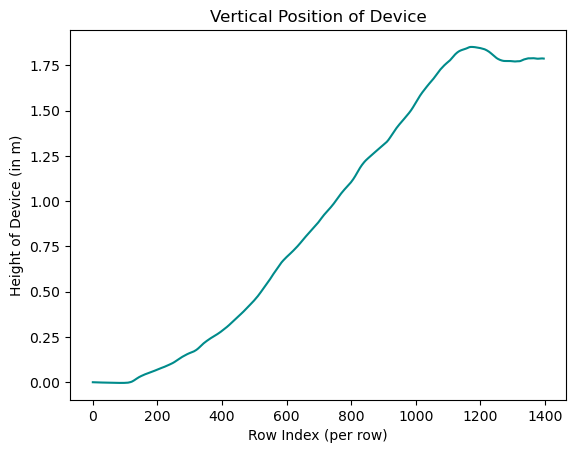

In [14]:
#Now similar before, we must integrate again to determine position.
m_height_2["z_position"] = m_height_2["z_velocity"].cumsum() * dt_2
plt.plot(m_height_2["z_position"], color = "DarkCyan")
plt.xlabel("Row Index (per row)")
plt.ylabel("Height of Device (in m)")
plt.title("Vertical Position of Device")


In [15]:
#Here now we will attempt to estimate the height of Maryanne. After this we will transpose the two different Measurement tests onto the same graph to compare them. 
height_2 = m_height_2["z_position"].iloc[1150:1225].mean()
height_2

1.844136860068736

Text(0.5, 1.0, 'Vertical Position of Device over Time')

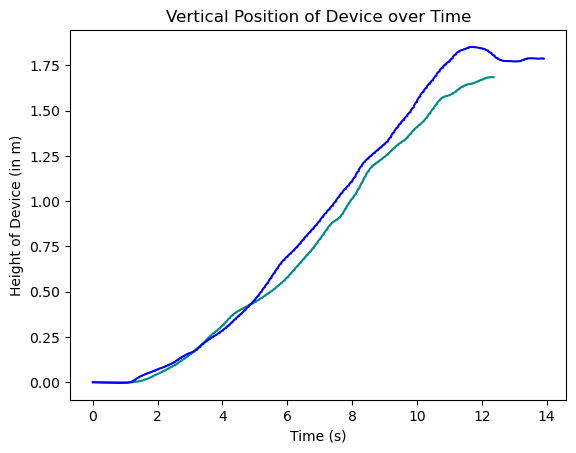

In [16]:
#Adding original test case plot to demonstrate differences and adding time onto the x-axis.
plt.plot(m_height_1["time"], m_height_1["z_position"], color = "DarkCyan")
plt.plot(m_height_2["time"], m_height_2["z_position"], color = "Blue")
plt.xlabel("Time (s)")
plt.ylabel("Height of Device (in m)")
plt.title("Vertical Position of Device over Time")


Maryanne's height greatly differs in this test case as opposed to before. This test itself with a measure of 1.84m or roughly 6 feet is an overestimate of her true height. This compares to the first test case where the result was much closer to Maryanne's true height (1.63/5.34 feet measured height). It's quite interesting to see how even in tests occuring quickly one after another, the tests themselves resulted in vastly different measurents. This also serves as a great example of Human error, as testing inconsistencies can immediately cause issues in a groups work. Finding a manner to automate this process and remove inconsistencies would be a great feat!

PART 2: PICK A DIFFERENT SENSOR

Data management: Describe the app used and the process of getting the data from the phone to your Jupyter environment

To collect the data, we used the Physics Toolbox. In this app, we selected the g-force sensor and recorded the data while throwing the phone up into the air as high as possible. We estimate this was around 12 feet though it will be interesting to see if this was actually the case. After collecting the data, we saved it within the app and shared it to one another. Next, we transferred the data from the phone to the Jupyter environment.

Data wrangling: Explain what you did to adjust, clean, and otherwise prepare the data for the analysis

The data was examined for inconsistencies and any gaps using features such as .info and .head. 

In [17]:
# Load the data from the CSV file
g_force= pd.read_csv('G_ForceTake 2.csv')
# Display the first few rows of the dataset
g_force.head()


,time,gFx,gFy,gFz,gFTotal
0,0.004100,-0.030807,-0.010849,-0.930191,0.931
1,0.012259,-0.034668,-0.004898,-0.932831,0.933
2,0.028696,-0.036499,-0.027237,-0.963867,0.965
3,0.032605,-0.034714,-0.042984,-1.010544,1.012
4,0.042787,-0.033707,-0.049286,-1.063950,1.066


In [18]:
# Display information about the dataset
g_force.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     596 non-null    float64
 1   gFx      596 non-null    float64
 2   gFy      596 non-null    float64
 3   gFz      596 non-null    float64
 4   gFTotal  596 non-null    float64
dtypes: float64(5)
memory usage: 23.4 KB


Analysis: Use at least one function (recall Table 5.8 Links to an external site.) to analyze the data, and explain the analysis

We decided to work with total g-force (gFTotal) becouse it accounted for all possible directions of acceleration. We believed this was important in order to capture the full force applied on the object.

Below the launch_force is calculated as the maximum value of the'gFTotal' column. This value gives us an idea of the force applied during the throw.

In [20]:
# Analyze Launch Force
launch_force = g_force['gFTotal'].max()
print(f'Launch Force: {launch_force} g')

Launch Force: 9.572 g


The free_fall selects rows from the DataFrame where the 'gFTotal' value is between 0.9 and 1.1. We chose this range to capture the phase where the phone experiences near-normal gravity, indicating free fall,i.e the motion of an object when it is only subject to the force of gravity and no other forces are acting upon it.

In [21]:
# Study Free Fall and Gravity
free_fall = g_force[g_force['gFTotal'].between(0.9, 1.1)]
free_fall

,time,gFx,gFy,gFz,gFTotal
0,0.004100,-0.030807,-0.010849,-0.930191,0.931
1,0.012259,-0.034668,-0.004898,-0.932831,0.933
2,0.028696,-0.036499,-0.027237,-0.963867,0.965
3,0.032605,-0.034714,-0.042984,-1.010544,1.012
4,0.042787,-0.033707,-0.049286,-1.063950,1.066
...,...,...,...,...,...
591,5.890372,0.046036,-0.203247,-1.032410,1.053
592,5.906979,0.029129,-0.205399,-1.026703,1.047
593,5.911033,0.004974,-0.217102,-1.029358,1.052
594,5.920945,0.015518,-0.201645,-1.033401,1.053


Integrate g-force data twice to estimate displacement. ChatGPT was utilized here to better understand the process of integration. 

In [22]:
# Calculate displacement during free fall
time_diff = free_fall['time'].diff()
displacement = (time_diff * (free_fall['gFTotal'] + free_fall['gFTotal'].shift(1)) / 2).cumsum()
# Find the peak altitude during free fall (maximum displacement)
peak_altitude = displacement.max()
print(f"Peak Altitude during Free Fall: {peak_altitude} m")

Peak Altitude during Free Fall: 5.825976098537444 m


Time of flight finds the maximum value of time, which represents the total duration of the flight. It provides information about how long the phone was in the air.

In [23]:
# Calculate Time of Flight
time_of_flight = g_force['time'].max() - g_force['time'].min()
print(f'Time of Flight: {time_of_flight} seconds')

Time of Flight: 5.926945924758911 seconds


Finds the minimum value of gFTotal, which represents the lowest g-force recorded upon impact. This value gives an estimate of the force experienced by the phone upon landing.

In [24]:
# Assess Impact Force
impact_force = g_force['gFTotal'].min()
print(f'Impact Force: {impact_force} g')

Impact Force: 0.016 g


This creates a plot using matplotlib to visualize the g-force data over time. The x-axis represents time, and the y-axis represents the g-force values. This plot provides a visual representation of how the g-force changes throughout the throw.

Visualization: Use matplotlib to visualize some dimension of the data, describe the graph and whether it seems to make sense

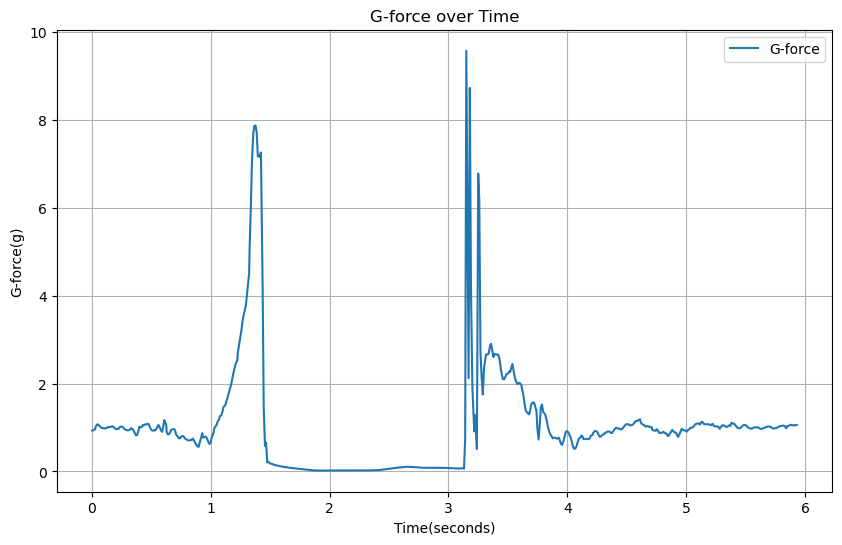

In [25]:
# Visualize the g-force as we threw the phone
plt.figure(figsize=(10, 6))
plt.plot(g_force['time'], g_force['gFTotal'], label='G-force')
plt.xlabel('Time(seconds)')
plt.ylabel('G-force(g)')
plt.title('G-force over Time')
plt.legend()
plt.grid(True)
plt.show()